## Tâche de classification {VRAI} vs {FAUX}

Etudiants : Cazeres Mathieu (22200082), Martin-Chantereau Etienne (21909526), Moreaux Victor (22200010), Poiret Valentin (21609227)

**Chargement des librairies et des fonctions**

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *

# fonctions (fonction de clean, import etc etc)
from Fonction.myFonction import *
from Fonction.AllModels import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Chargement des données équilibrés**

In [8]:
#Importation du jeu de donné traité obtenu avec Traitement_data.ipynb
mySample = pd.read_csv('./Data_equilibre/balanced_data_VF.csv')

print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

True     500
False    500
Name: our rating, dtype: int64


**Test de tout les modèles**

On teste tout les modèles de base pour voir lesquels sont le splus performants :

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.758 (0.065) in 2.227 s
Evaluation de  LR
LR : 0.784 (0.049) in 21.474 s
Evaluation de  KNN
KNN : 0.668 (0.041) in 5.114 s
Evaluation de  CART
CART : 0.702 (0.035) in 35.351 s
Evaluation de  RF
RF : 0.790 (0.039) in 38.816 s
Evaluation de  SVM
SVM : 0.820 (0.029) in 249.748 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.820  (0.029)  en 249.748   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.820  (0.029)  en 249.748   s
Classifier :  RF  accuracy : 0.790  (0.039)  en 38.816   s
Classifier :  LR  accuracy : 0.784  (0.049)  en 21.474   s
Classifier :  MultinomialNB  accuracy : 0.758  (0.065)  en 2.227   s
Classifier :  CART  accuracy : 0.702  (0.035)  en 35.351   s
Classifier :  KNN  accuracy : 0.668  (0.041)  en 5.114   s


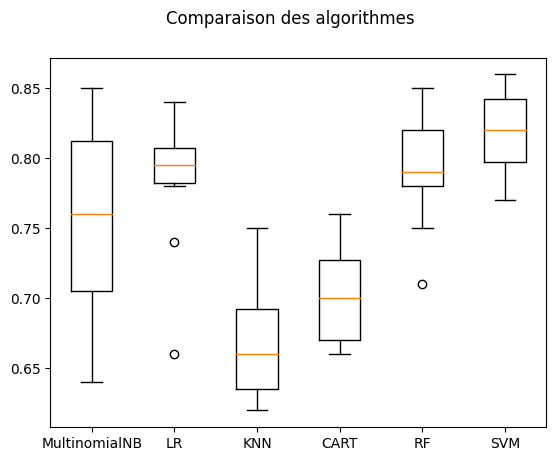

In [ ]:
testAllModel(X_train,y_train,3)

Les modèles SVM, LR, RF et MNB sont les plus performants pour la tâche de classification {VRAI} vs {FAUX}.
Pour chacun de ces modèles, nous allons chercher les meilleurs paramètrages de prétraitement et les meilleurs paramètrages du modèle.

## Modèle SVM (Support Vector Machine)

Recherche du meilleur paramètrage et sauvegarde des résultats de tout les paramètrages dans le fichier data_svc_VF:

In [ ]:
testSVC(X_train,y_train,3,'data_svc_VF')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Fitting 3 folds for each of 1280 candidates, totalling 3840 fits
réalisé en  1384.504 s
Meilleur résultat : 0.782
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	svm__C: 10
	svm__gamma: 0.1
	svm__kernel: 'rbf'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
933                       False                  True    10.0        0.10   
1253                      False                 False    10.0        0.10   
945                       False                  True    10.0        1.00   
913                       False                  True    10.0        0.01   
929                       False                  True    10.0        0.10   

     svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
933          rbf              True              None  0.782064  
1253         rbf              True              None  0.779069  
945 

Affichage de l'accuracy en fonction de l'index des différents paramètrages :

,cleaner__getlemmatisation,cleaner__removedigit,svm__C,svm__gamma,svm__kernel,tfidf__lowercase,tfidf__stop_words,accuracy
0,False,True,10.0,0.10,rbf,True,NaN,0.782064
1,False,False,10.0,0.10,rbf,True,NaN,0.779069
2,False,True,10.0,1.00,linear,True,NaN,0.777076
3,False,True,10.0,0.01,linear,True,NaN,0.777076
4,False,True,10.0,0.10,linear,True,NaN,0.777076


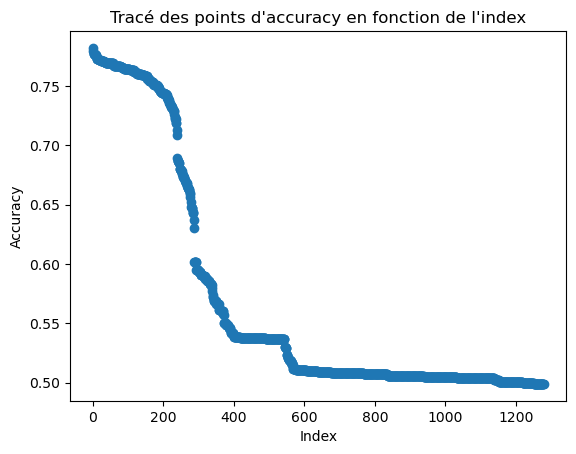

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Chargement des données
data = pd.read_csv('./Data_parametrage/data_svc_VF.csv')


display(data.head())

df = data
# Récupérer les valeurs de x et de y
x = df.index.values
y = df['accuracy']

# Tracer les points
plt.scatter(x, y)

# Ajouter un titre et des labels d'axe
plt.title("Tracé des points d'accuracy en fonction de l'index")
plt.xlabel('Index')
plt.ylabel('Accuracy')

# Afficher le plot
plt.show()

Affichage des points de rupture sur la courbe et de la proportion de certains paramètres pour chaque segment :

     -------------------------------------- 383.3/383.3 kB 2.2 MB/s eta 0:00:00


,cleaner__getlemmatisation,cleaner__removedigit,svm__C,svm__gamma,svm__kernel,tfidf__lowercase,tfidf__stop_words,accuracy
0,False,True,10.0,0.10,rbf,True,vide,0.782064
1,False,False,10.0,0.10,rbf,True,vide,0.779069
2,False,True,10.0,1.00,linear,True,vide,0.777076
3,False,True,10.0,0.01,linear,True,vide,0.777076
4,False,True,10.0,0.10,linear,True,vide,0.777076


posx and posy should be finite values
posx and posy should be finite values


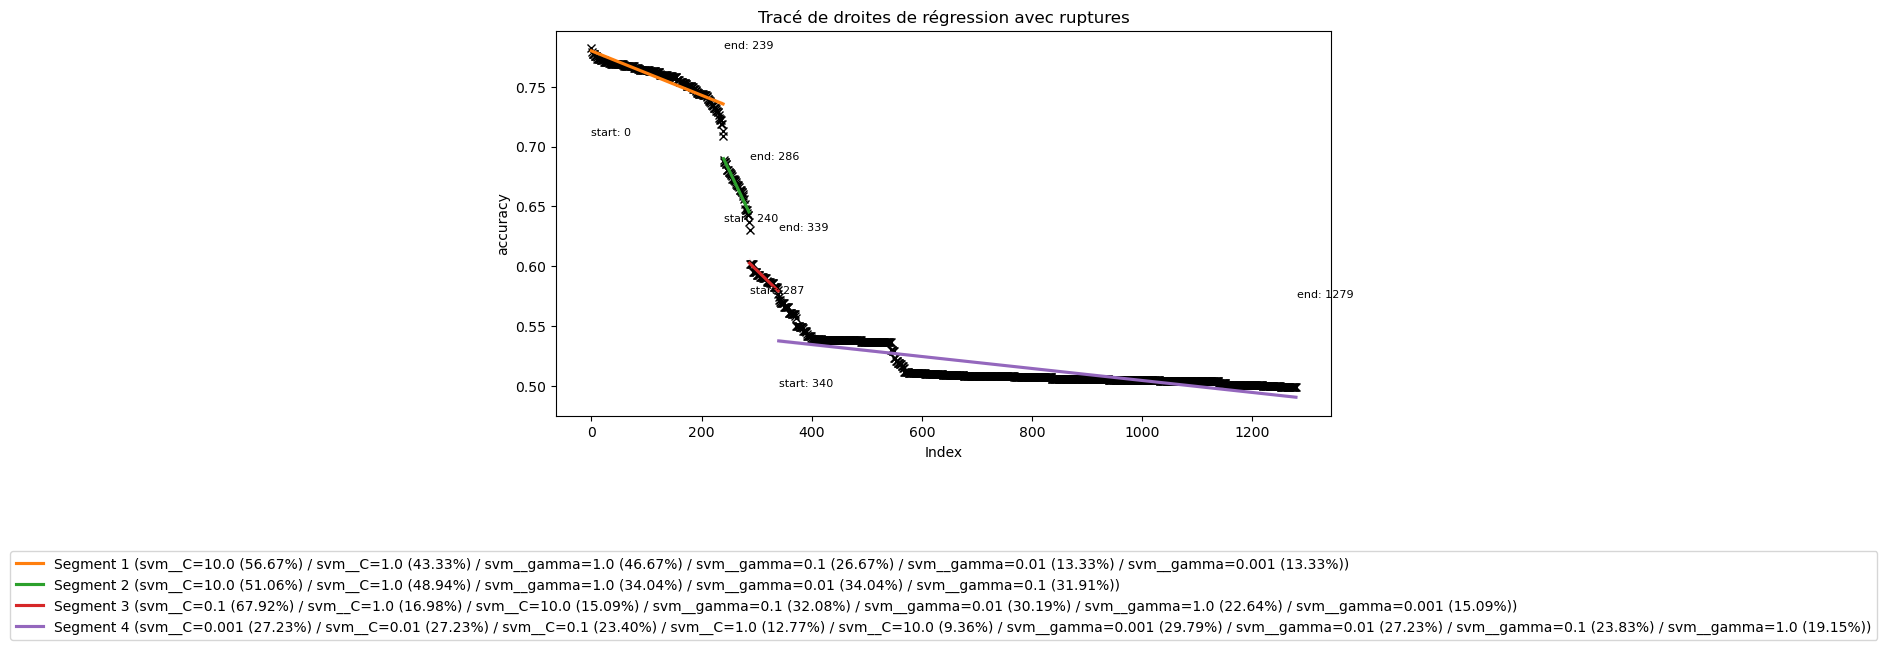

posx and posy should be finite values
posx and posy should be finite values


In [4]:
from numpy import NaN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ruptures
import ruptures as rpt

# Charger les données
data = pd.read_csv('./Data_parametrage/data_svc_VF.csv')

data.fillna('vide', inplace=True)
display(data.head())
# Sélectionner les colonnes à analyser
y_colonne = 'accuracy'

signal = data[y_colonne].values
model = "l2"
algo = rpt.Window(width=55, model=model, jump=1).fit(signal)
result = algo.predict(n_bkps=3)

fig, ax = plt.subplots(figsize=(10, 5))
# Define a list of parameters to show in the legend
params = ['svm__C','svm__gamma']

# Plot the data points
ax.plot(data.index, data[y_colonne], 'x', color='black')
my_row=[]
for i, (start, end) in enumerate(zip([0] + result, result + [len(signal)])):
    segment = data.iloc[start:end]
    
    # Calculate the proportion of each unique value in the selected columns for this segment
    param_props = []
    for param in params:
        param_value_counts = segment[param].value_counts(normalize=True)
        param_value_props = [f"{count*100:.2f}%" for count in param_value_counts]
        param_value_legend = " / ".join([f"{param}={param_value} ({param_value_props[j]})" 
                                         for j, param_value in enumerate(param_value_counts.index)])
        param_props.append(param_value_legend)
        
    # Join the legends for each parameter into one legend for the segment
    segment_legend = " / ".join(param_props)
    
    # Plot the regression line for this segment with the corresponding color and legend
    sns.regplot(x=segment.index, y=y_colonne, data=segment, ax=ax, color=f'C{i+1}', 
                label=f'Segment {i+1} ({segment_legend})', scatter=False)
    
    # Add text to show the start and end of each segment
    if(start != len(data[y_colonne])):
      ax.text(start, segment[y_colonne].min(), f'start: {start}', fontsize=8)
      if start not in my_row: 
        my_row.append(start)
    if(end-1 != len(data[y_colonne])):
      ax.text(end, segment[y_colonne].max(), f'end: {end-1}', fontsize=8)
      if end-1 not in my_row: 
        my_row.append(end-1)
      

# Set the axis labels and title
ax.set_xlabel('Index')
ax.set_ylabel(y_colonne)
ax.set_title('Tracé de droites de régression avec ruptures')

# Hide the current legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=1)


plt.show()

fig.savefig('./Images/data_svm_VF.png', dpi=300, bbox_inches='tight')


Affichage des courbes de ROC pour les extrèmes des différents segments :

,cleaner__getlemmatisation,cleaner__removedigit,svm__C,svm__gamma,svm__kernel,tfidf__lowercase,tfidf__stop_words,accuracy
0,False,True,10.0,0.10,rbf,True,vide,0.782064
1,False,False,10.0,0.10,rbf,True,vide,0.779069
2,False,True,10.0,1.00,linear,True,vide,0.777076
3,False,True,10.0,0.01,linear,True,vide,0.777076
4,False,True,10.0,0.10,linear,True,vide,0.777076


      cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
0                         False                  True  10.000         0.1   
239                        True                 False   1.000         1.0   
240                       False                  True  10.000         1.0   
286                        True                 False   1.000         0.1   
287                        True                  True   1.000         0.1   
339                       False                 False   0.100         1.0   
340                        True                  True   0.100         1.0   
1279                       True                 False   0.001         1.0   

     svm__kernel  tfidf__lowercase tfidf__stop_words  accuracy  
0            rbf              True              vide  0.782064  
239         poly             False              vide  0.709077  
240         poly              True           english  0.689063  
286          rbf             False           e

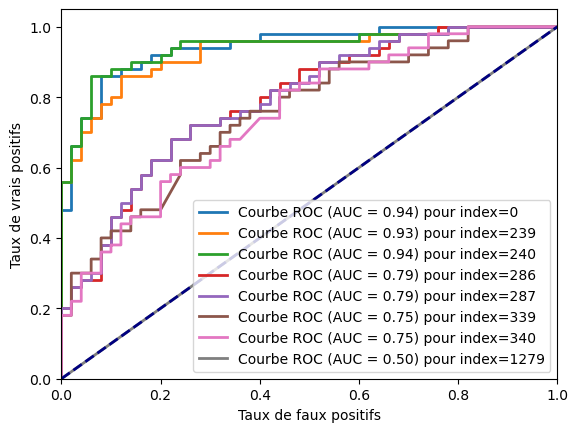

In [5]:
# Charger les données
data = pd.read_csv('./Data_parametrage/data_svc_VF.csv')

data.fillna('vide', inplace=True)
display(data.head())

df_selection = data.loc[my_row]


print(df_selection)

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 90% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)
# Initialiser une liste pour stocker les résultats de la prédiction pour chaque pipeline
y_pred_probas = []
plt.figure()

for index, row in df_selection.iterrows():

  stopswords = 'english' if row.cleaner__getlemmatisation is None else None

  pipeline=Pipeline([
      ("cleaner", TextNormalizer(removedigit=row.cleaner__removedigit, getlemmatisation=row.cleaner__getlemmatisation)),
      ("tfidf", TfidfVectorizer(lowercase=row.tfidf__lowercase, stop_words=stopswords)),
        ('svm', SVC(C=row.svm__C, gamma=row.svm__gamma, kernel=row.svm__kernel,probability=True)) #####################
  ])
  # Entraîner le modèle avec le jeu d'apprentissage
  pipeline.fit(train_title, train_note)

  # Test avec les données qu'il a apprises
  y_pred = pipeline.predict(test_title)

  # Calcul de la courbe ROC
  y_pred_proba = pipeline.predict_proba(test_title)[:,1]
  fpr, tpr, thresholds = roc_curve(test_note, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  # Tracé de la courbe ROC

  plt.plot(fpr, tpr, lw=2, label='Courbe ROC (AUC = %0.2f) pour index=%d' % (roc_auc, index))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
# plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()



Enregistrement du modele SVC avec les meilleurs paramètres déterminés et affichage de la matrice de confusion et de la courbe ROC correspondante :

Sauvegarde du modèle dans  ./Modele/VF_svm.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=10, gamma=0.1, probability=True))])
Accuracy : 0.860
Classification Report
              precision    recall  f1-score   support

       False    0.89130   0.82000   0.85417        50
        True    0.83333   0.90000   0.86538        50

    accuracy                        0.86000       100
   macro avg    0.86232   0.86000   0.85978       100
weighted avg    0.86232   0.86000   0.85978       100



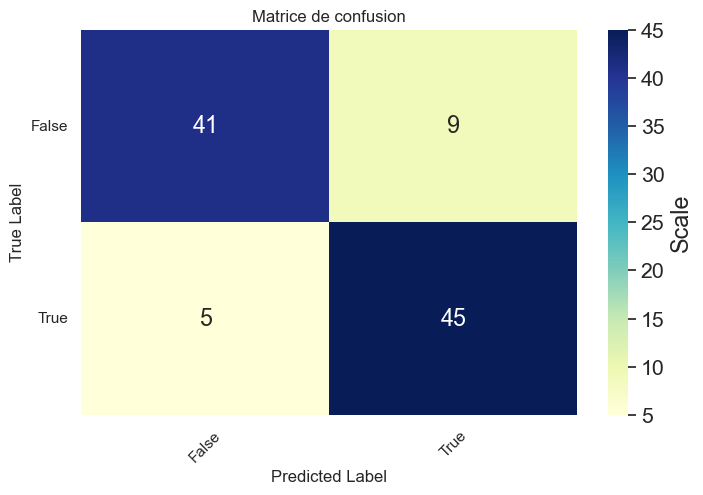

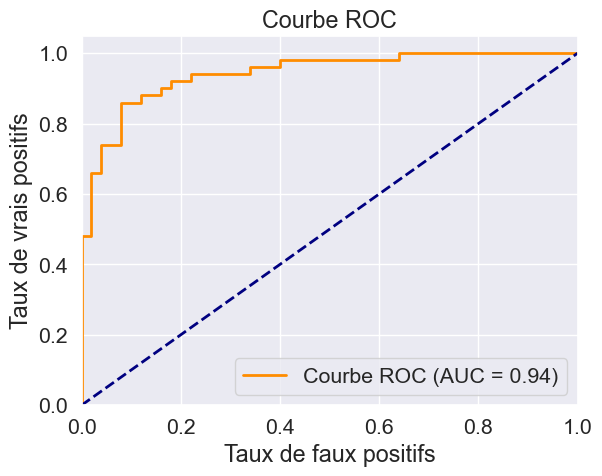

In [6]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('svm', SVC(C=10, gamma=0.1, kernel='rbf',probability=True))
])
pipeline.fit(train_title,train_note)
filename='./Modele/VF_svm.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

# Calcul de la courbe ROC
y_pred_proba = clf_loaded.predict_proba(test_title)[:,1]
fpr, tpr, thresholds = roc_curve(test_note, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


## Modèle LR (LogisticRegression)

Recherche du meilleur paramètrage et sauvegarde des résultats de tout les paramètrages dans le fichier data_lr_VF:

In [ ]:
testLR(X_train,y_train,3,'data_lr_VF')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
réalisé en  222.677 s
Meilleur résultat : 0.778
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
181                      False                 False  100.0          l2   
185                      False                 False  100.0          l2   
189                      False                 False  100.0          l2   
73     

Affichage des points de rupture sur la courbe et de la proportion du paramètre C du modèle LR pour chaque segment :

,cleaner__getlemmatisation,cleaner__removedigit,lr__C,lr__penalty,lr__solver,tfidf__lowercase,tfidf__stop_words,accuracy
0,False,False,100.0,l2,newton-cg,True,vide,0.778065
1,False,False,100.0,l2,lbfgs,True,vide,0.778065
2,False,False,100.0,l2,liblinear,True,vide,0.778065
3,True,False,10.0,l2,newton-cg,True,vide,0.778056
4,True,False,10.0,l2,lbfgs,True,vide,0.778056


  lr__C=100.0 lr__C=10.0 lr__C=1.0 lr__C=0.01 lr__C=0.1
0         NaN        NaN       NaN        NaN       NaN
1         NaN        NaN       NaN        NaN       NaN
2         NaN        NaN       NaN        NaN       NaN


posx and posy should be finite values
posx and posy should be finite values


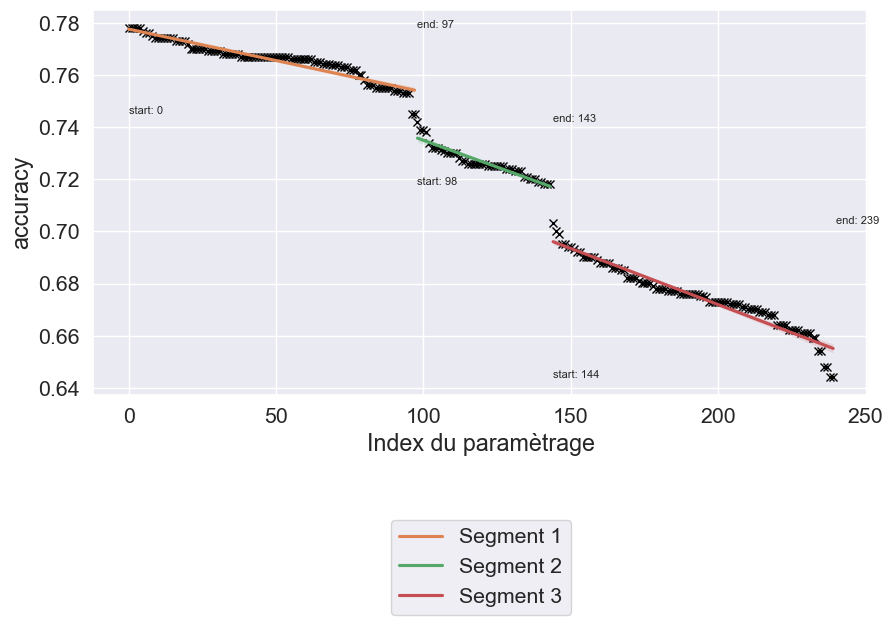

posx and posy should be finite values
posx and posy should be finite values


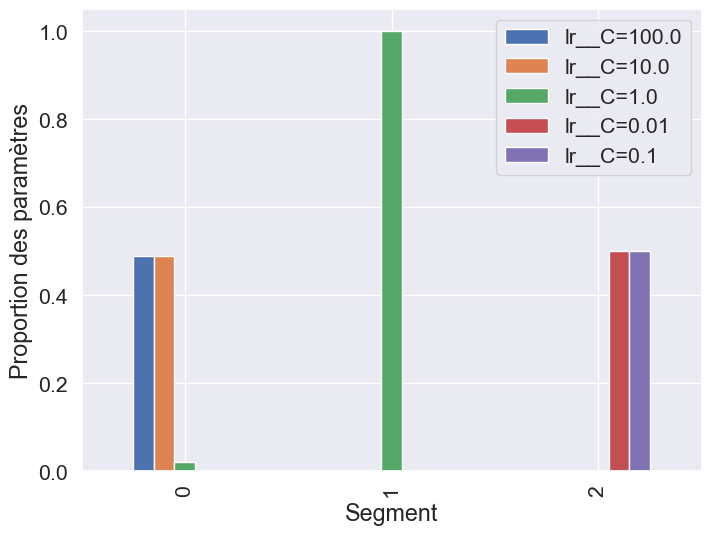

In [20]:
from matplotlib import patches
from numpy import NaN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ruptures
import ruptures as rpt

# Charger les données
data = pd.read_csv('./Data_parametrage/data_lr_VF.csv')

data.fillna('vide', inplace=True)
display(data.head())
# Sélectionner les colonnes à analyser
y_colonne = 'accuracy'

signal = data[y_colonne].values
model = "l2"
algo = rpt.Window(width=40, model=model, jump=1).fit(signal)
result = algo.predict(n_bkps=2)

fig, ax = plt.subplots(figsize=(10, 5))


#Tu choisis la liste des param ici a visualiser je te conseil de le faire en deux fois


params = ['lr__C']#'cleaner__removedigit','cleaner__getlemmatisation','tfidf__stop_words','tfidf__lowercase','lr__solver'] #

l = []
for param in params:
  p = data[param].value_counts(normalize=True)
  for i in range(len(p)):
    x = p.index.tolist()[i]
    l.append(str(param)+"="+str(x))


mydf = pd.DataFrame(columns=l,index=[0, 1, 2])
print(mydf)



# Plot the data points
ax.plot(data.index, data[y_colonne], 'x', color='black')
my_row=[]
for i, (start, end) in enumerate(zip([0] + result, result + [len(signal)])):
    segment = data.iloc[start:end]
    
    # Calculate the proportion of each unique value in the selected columns for this segment
    param_props = []
    for param in params:
        param_value_counts = segment[param].value_counts(normalize=True)

        param_value_props = [f"{count*100:.2f}%" for count in param_value_counts]
        
        param_value_legend = " / ".join([f"{param}={param_value} ({param_value_props[j]})" 
                                         for j, param_value in enumerate(param_value_counts.index)])
        
        param_props.append(param_value_legend)

        for j, param_value in enumerate(param_value_counts.index):
          k=str(param)+"="+str(param_value)
          
          # print(k)
          param_value_counts_df = param_value_counts.reset_index()
          param_value_counts_df = param_value_counts_df.rename(columns={param: 'Parametre', 0: 'Pourcentage'})
          # print(param_value_counts_df.loc[j, 'Parametre'])
          mydf.loc[i][k]=param_value_counts_df.loc[j, 'Parametre']
        
    # Join the legends for each parameter into one legend for the segment
    segment_legend = " / ".join(param_props)
    
    # Plot the regression line for this segment with the corresponding color and legend
    sns.regplot(x=segment.index, y=y_colonne, data=segment, ax=ax, color=f'C{i+1}', 
                label=f'Segment {i+1}', scatter=False)
    
    # Add text to show the start and end of each segment
    if(start != len(data[y_colonne])):
        ax.text(start, segment[y_colonne].min(), f'start: {start}', fontsize=8)
        if start not in my_row: 
            my_row.append(start)
    if(end-1 != len(data[y_colonne])):
        ax.text(end, segment[y_colonne].max(), f'end: {end-1}', fontsize=8)
        if end-1 not in my_row: 
            my_row.append(end-1)
    
    # Set the values of the corresponding row in mydf to the parameters in this segment
      

   
    
# d = pd.DataFrame(my_param, columns=nom_col)

# Set the axis labels and title
ax.set_xlabel('Index du paramètrage')
ax.set_ylabel(y_colonne)
# ax.set_title('Tracé de droites de régression avec ruptures des paramètrage différents du modèle en fonction de l\'accuracy')

# Hide the current legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=1)


plt.show()

fig.savefig('./Images/data_lr_VF.png', dpi=300, bbox_inches='tight')




# créer le graphique
fig, ax = plt.subplots(figsize=(8, 6))
mydf.plot(kind='bar', ax=ax)

# ajouter des étiquettes
# ax.set_title('Proportion des paramètres sans impact pour le modèle LogisticRegression pour chacun des segments')
ax.set_xlabel('Segment')
ax.set_ylabel('Proportion des paramètres')
legend = ax.legend(ncol=1)

# afficher le graphique
plt.show()

Affichage des courbes de ROC pour les points extrèmes des différents segments :

,cleaner__getlemmatisation,cleaner__removedigit,lr__C,lr__penalty,lr__solver,tfidf__lowercase,tfidf__stop_words,accuracy
0,False,False,100.0,l2,newton-cg,True,vide,0.778065
1,False,False,100.0,l2,lbfgs,True,vide,0.778065
2,False,False,100.0,l2,liblinear,True,vide,0.778065
3,True,False,10.0,l2,newton-cg,True,vide,0.778056
4,True,False,10.0,l2,lbfgs,True,vide,0.778056


     cleaner__getlemmatisation  cleaner__removedigit   lr__C lr__penalty  \
0                        False                 False  100.00          l2   
97                       False                  True    1.00          l2   
98                       False                  True    1.00          l2   
143                       True                 False    1.00          l2   
144                      False                  True    0.01          l2   
239                       True                 False    0.01          l2   

    lr__solver  tfidf__lowercase tfidf__stop_words  accuracy  
0    newton-cg              True              vide  0.778065  
97       lbfgs             False           english  0.745074  
98   liblinear             False           english  0.742074  
143  liblinear              True              vide  0.718068  
144  liblinear             False           english  0.703074  
239  newton-cg              True           english  0.644093  


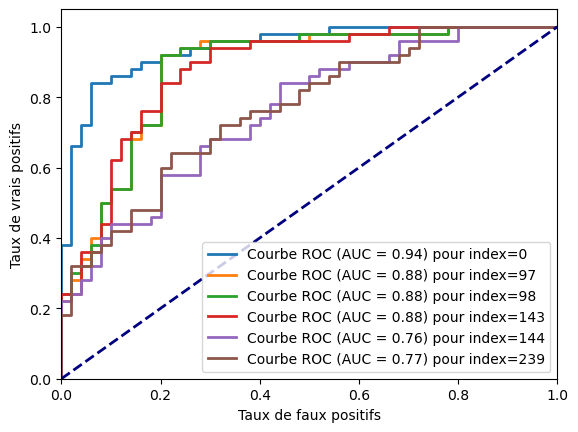

In [9]:

# Charger les données
data = pd.read_csv('./Data_parametrage/data_lr_VF.csv')

data.fillna('vide', inplace=True)
display(data.head())

df_selection = data.loc[my_row]


print(df_selection)

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)
# Initialiser une liste pour stocker les résultats de la prédiction pour chaque pipeline
y_pred_probas = []
plt.figure()

for index, row in df_selection.iterrows():

  stopswords = 'english' if row.cleaner__getlemmatisation is None else None

  pipeline=Pipeline([
      ("cleaner", TextNormalizer(removedigit=row.cleaner__removedigit, getlemmatisation=row.cleaner__getlemmatisation)),
      ("tfidf", TfidfVectorizer(lowercase=row.tfidf__lowercase, stop_words=stopswords)),
      ('lr', LogisticRegression(C=row.lr__C,penalty='l2', solver=row.lr__solver))
  ])
  # Entraîner le modèle avec le jeu d'apprentissage
  pipeline.fit(train_title, train_note)

  # Test avec les données qu'il a apprises
  y_pred = pipeline.predict(test_title)

  # Calcul de la courbe ROC
  y_pred_proba = pipeline.predict_proba(test_title)[:,1]
  fpr, tpr, thresholds = roc_curve(test_note, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  # Tracé de la courbe ROC

  plt.plot(fpr, tpr, lw=2, label='Courbe ROC (AUC = %0.2f) pour index=%d' % (roc_auc, index))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
# plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()



Enregistrement du modele LR avec les meilleurs paramètres déterminés et affichage de la matrice de confusion et de la courbe ROC correspondante :
Affichage en nuage de point des texte utilisé pour le test du classifieur LR dans le but de visualiser une eventuelle tendance des articles qui ont été mal labélisés par le modèle (peu concluant)

Sauvegarde du modèle dans  ./Modele/VF_LR.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=100, solver='newton-cg'))])
Accuracy : 0.860
Classification Report
              precision    recall  f1-score   support

       False    0.87500   0.84000   0.85714        50
        True    0.84615   0.88000   0.86275        50

    accuracy                        0.86000       100
   macro avg    0.86058   0.86000   0.85994       100
weighted avg    0.86058   0.86000   0.85994       100



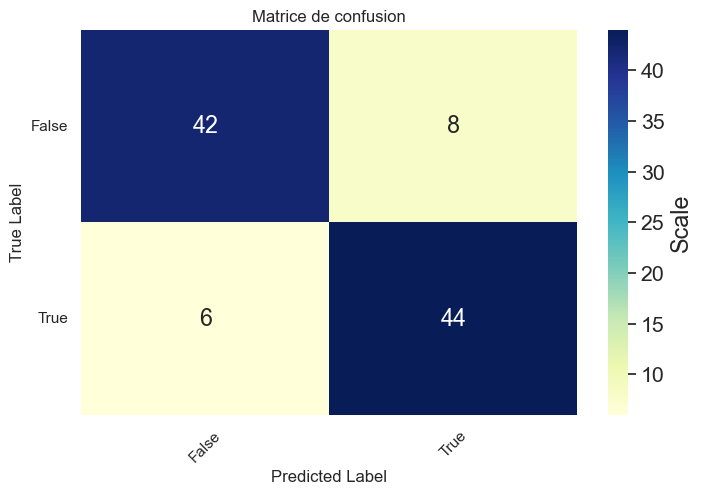

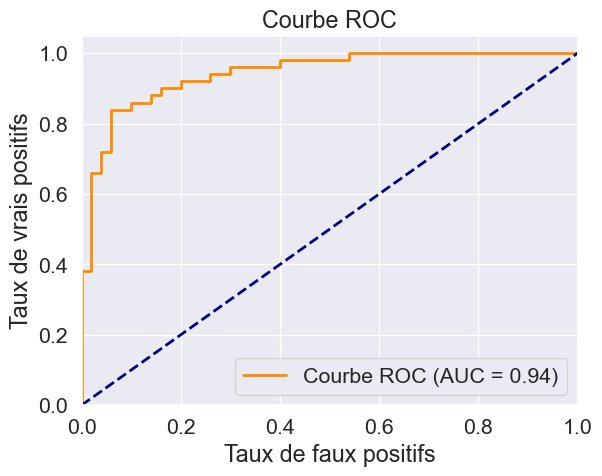

In [12]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 90% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='newton-cg'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/VF_LR.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))

print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)

# Test avec les données qu'il a apprises
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

# Calcul de la courbe ROC
y_pred_proba = clf_loaded.predict_proba(test_title)[:,1]
fpr, tpr, thresholds = roc_curve(test_note, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


new_class_data = pd.DataFrame(np.column_stack((test_title, y_pred,test_note)), columns=['title', 'predictions','note'])


# # concatenate the two dataframes
# new_class_data = pd.concat([test_title, predictions_df],ignore_index = True)

new_class_data = new_class_data.loc[~new_class_data['predictions'].isin(["false","true"])]
# print(new_class_data)


import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

text_normalizer = TextNormalizer(getlemmatisation=True, removedigit=True, removestopwords=True)
cleaned_text = text_normalizer.fit_transform(new_class_data["title"])
tfidf = TfidfVectorizer(lowercase=False)
vector_tfidf = tfidf.fit_transform(cleaned_text)
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(vector_tfidf.toarray())

# Ajoutez une colonne pour indiquer si la prédiction du modèle est correcte ou non
new_class_data["correct"] = (new_class_data["predictions"] == new_class_data["note"])

# Tracez un graphique en utilisant Plotly pour représenter les projections obtenues avec des couleurs différentes pour les prédictions correctes et incorrectes
fig = px.scatter(x=projections[:,0], y=projections[:,1], color=new_class_data["correct"],symbol=new_class_data["note"])
fig.show()


## Modèle RFC (RandomForestClassifier)

Recherche du meilleur paramètrage et sauvegarde des résultats de tout les paramètrages dans le fichier data_rfc_VF:

In [ ]:
testRFC(X_train,y_train,3,'data_rfc_VF')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  624.752 s
Meilleur résultat : 0.785
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: True
	rfc__max_depth: 30
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 5
	rfc__n_estimators: 1200
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
54                        True                  True              30   
7                         True                  True              25   
246                

Enregistrement du modele RFC avec les meilleurs paramètres déterminés et affichage de la matrice de confusion et de la courbe ROC correspondante :

Sauvegarde du modèle dans  ./Modele/VF_rfc.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner',
                 TextNormalizer(getlemmatisation=True, removedigit=True)),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_split=5,
                                        n_estimators=1200))])
Accuracy : 0.770
Classification Report
              precision    recall  f1-score   support

       False    0.80000   0.72000   0.75789        50
        True    0.74545   0.82000   0.78095        50

    accuracy                        0.77000       100
   macro avg    0.77273   0.77000   0.76942       100
weighted avg    0.77273   0.77000   0.76942       100



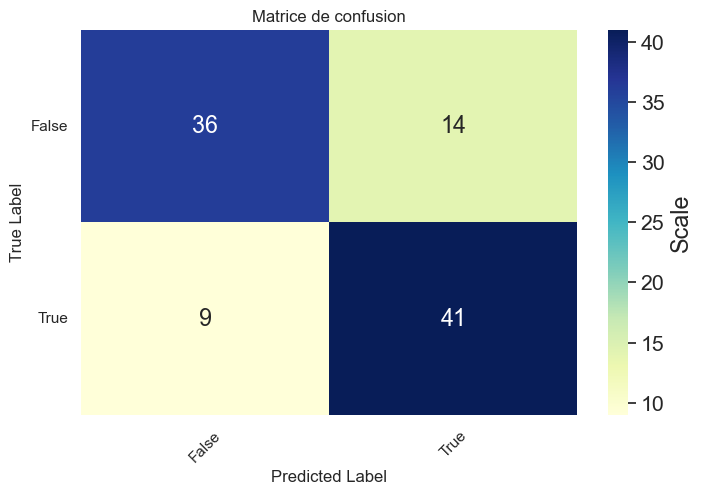

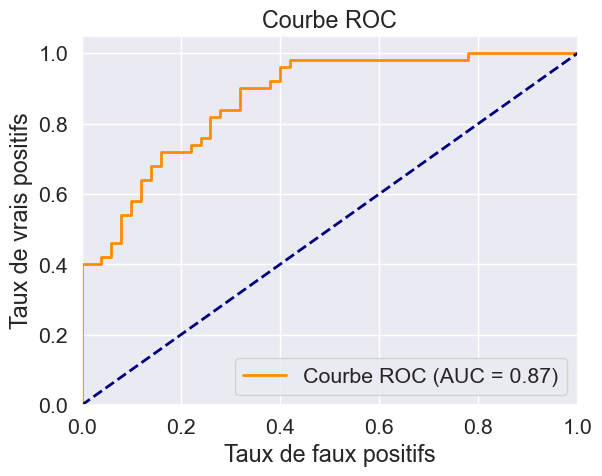

In [14]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words='english')),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=1, min_samples_split=5, n_estimators=1200))
])
pipeline.fit(train_title,train_note)
filename='./Modele/VF_rfc.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)



# Calcul de la courbe ROC
y_pred_proba = clf_loaded.predict_proba(test_title)[:,1]
fpr, tpr, thresholds = roc_curve(test_note, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


## Modèle MNB (MultinomialNB)

Recherche du meilleur paramètrage et sauvegarde des résultats de tout les paramètrages dans le fichier data_mnb_VF:

In [ ]:
testMNB(X_train,y_train,3,'data_mnb_VF')

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'mnb']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'mnb__alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]), 'mnb__fit_prior': [True, False], 'mnb__force_alpha': [True, False]}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
réalisé en  351.543 s
Meilleur résultat : 0.749
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	mnb__alpha: 0.5
	mnb__fit_prior: True
	mnb__force_alpha: True
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  mnb__alpha  \
207                      False                  True         0.5   
203                      False                  True         0.5   
199                      False                  True         0.5   
195            

Enregistrement du modele MNB avec les meilleurs paramètres déterminés et affichage de la matrice de confusion et de la courbe ROC correspondante :

Sauvegarde du modèle dans  ./Modele/MNB_VF.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('mnb', MultinomialNB(alpha=0.5))])
Accuracy : 0.750
Classification Report
              precision    recall  f1-score   support

       False    0.85714   0.60000   0.70588        50
        True    0.69231   0.90000   0.78261        50

    accuracy                        0.75000       100
   macro avg    0.77473   0.75000   0.74425       100
weighted avg    0.77473   0.75000   0.74425       100



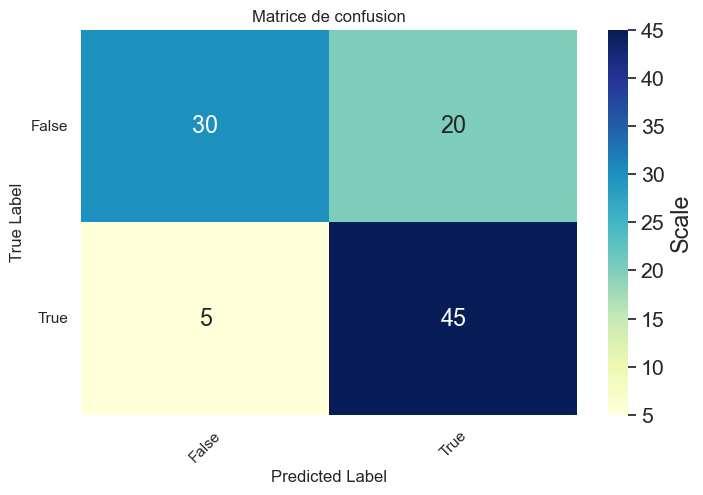

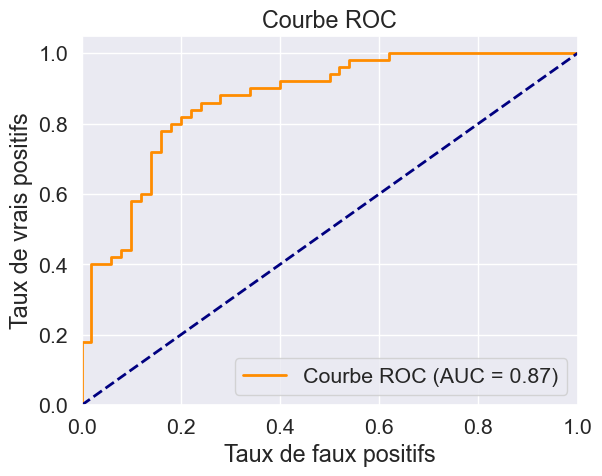

In [17]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('mnb', MultinomialNB(alpha=0.5, fit_prior=True)) #force_alpha=True
])
pipeline.fit(train_title,train_note)
filename='./Modele/MNB_VF.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)


# Calcul de la courbe ROC
y_pred_proba = clf_loaded.predict_proba(test_title)[:,1]
fpr, tpr, thresholds = roc_curve(test_note, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [21]:
from Fonction.visualisation import *

myTSNE_2d_3d(X_train,y_train,True,True)